In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**GOAL:-**
- 1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).
- 2. Implement Naive Bayes on your own from scratch for text classification. 
- 3. Compare Results of your implementation of Naive Bayes with one in Sklearn.
- The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [17]:
st = [1,2,3,4]
print(type(st))
print(dir(st))#gives all methods of list of python to print it prettier
# we uses pprint function
from pprint import pprint

<class 'list'>
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [18]:
pprint(dir(st))

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']


In [30]:
pprint(len(list(newsgroups_train.target_names))) # 20 category
pprint(list(newsgroups_train.target_names)) # names of categories
# task is a classifier on given documents into these given categories

20
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [26]:
print(type(newsgroups_train))

<class 'sklearn.utils.Bunch'>


We need to convert the given data into the form of X[] and Y[]
were X[] will contain name of features(words) and Y[] categories
1. Create Dictionary of words in document as key and frequency as value
like w1 -> freq
     w2 -> freq....
there will be very few words with maximum no. of frequency.
we will also filter words with small frequency, before adding this words
to the dictionary we need to remove the "STOPWORDS"
then pick top K words because all words wont be having same frequencies.
1. Go through all documents
2. within the doc. go through all words
3. ignore the word if its a stopword
4. add the word in dictionary if not already present
5. else increase the frequency
6. Choose top K word as features


In [40]:
# stopwords from https://gist.github.com/sebleier/554280
stop_words =["i", "me", "my", "myself", "we", "our", "ours", "ourselves",
             "you", "your", "yours", "yourself", "yourselves", "he", "him"
             , "his", "himself", "she", "her", "hers", "herself", "it",
             "its", "itself", "they", "them", "their", "theirs", "themselves",
             "what", "which", "who", "whom", "this", "that", "these", "those",
             "am", "is", "are", "was", "were", "be", "been", "being", "have",
             "has", "had", "having", "do", "does", "did", "doing", "a", "an",
             "the", "and", "but", "if", "or", "because", "as", "until", "while",
             "of", "at", "by", "for", "with", "about", "against", "between", 
             "into", "through", "during", "before", "after", "above", "below", 
             "to", "from", "up", "down", "in", "out", "on", "off", "over", 
             "under", "again", "further", "then", "once", "here", "there", 
             "when", "where", "why", "how", "all", "any", "both", "each", 
             "few", "more", "most", "other", "some", "such", "no", "nor", "not",
             "only", "own", "same", "so", "than", "too", "very", "s", "t", "can",
             "will", "just", "don", "should", "now"]

In [42]:
"""
Creating X[] as a list of tuple where first element of tuple is name of
document and text in document
Y[] as Category
"""
X = []
Y = []

In [54]:
import os
path = "./20newsgroup Dataset/"

In [55]:
pprint(os.listdir(path))

['Datasets']


In [56]:
path = "./20newsgroup Dataset/Datasets/"
pprint(os.listdir(path))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [67]:
for category in os.listdir(path): #"./20newsgroup Dataset/Datasets/"
    for documents in os.listdir(path+category): #"./20newsgroup Dataset/Datasets/alt.atheism"
        with open(path+category+'/'+documents,'r') as f: #"./20newsgroup Dataset/Datasets/alt.atheism/49960"
            X.append((documents,f.read()))
            Y.append(category)

In [173]:
pprint(type(X))
pprint(type(X[0]))
pprint(type(X[0][0]))
pprint(type(X[0][1]))
pprint(type(Y))
pprint(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960',
 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 '
 'news.answers:7054 alt.answers:126\n'
 'Path: '
 'cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\n'
 'From: mathew <mathew@mantis.co.uk>\n'
 'Newsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\n'
 'Subject: Alt.Atheism FAQ: Atheist Resources\n'
 'Summary: Books, addresses, music -- anything related to atheism\n'
 'Keywords: FAQ, atheism, books, music, fiction, addresses, contacts\n'
 'Message-ID: <19930329115719@mantis.co.uk>\n'
 'Date: Mon, 29 Mar 1993 11:57:19 GMT\n'
 'Expires: Thu, 29 Apr 1993 11:57:19 GMT\n'
 'Followup-To: alt.atheism\n'
 'Distribution: world\n'
 'Organization: Mantis Consultants, Cambridge. UK.\n'
 'Approved: news-answers-reque

In [95]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [96]:
# Split using Regex Is Better than working with normal split function
import re
sample_string = "Hello there!, this Aryaveer., and currently learning data science and working Aryaveer on this project."

In [97]:
"""
Identifiers:
\d any number
\D anything but a number
\s space
\S anything but space
\w any character
\W any but Character [^a-zA-Z0-9_]
. = any char, except newline
\b the white space around words
\. a period
Modifiers:
{1,3} we're expection 1 3 \d{1-3}
+ Match 1 or more
? match 0 or 1
* Match 0 or more
$ match the end of string
^ matching the beggining of a string
| either or 
[] range or variance

White Space Characters:
\n new line
\s space
\t tab
\e escape
\f form feed
\r return 
"""
pprint(re.split(r'\W+',sample_string)) # '\W'  It matches any non-word character and is equivalent to [^a-zA-Z0-9_]:

['Hello',
 'there',
 'this',
 'Aryaveer',
 'and',
 'currently',
 'learning',
 'data',
 'science',
 'and',
 'working',
 'Aryaveer',
 'on',
 'this',
 'project',
 '']


In [115]:
# making dictionary as explained above
dictionary = dict()
for x in range(len(x_train)):
# X[] was splitted into x_train, but X[0] is name of document 
# and X[1] is the text so we will iterate over X[1]
    currentWord = x_train[x][1].lower()
    # splitting text into words
    strippedList = re.split(r'\W+', currentWord)
    for word in strippedList:
        #skip stopword, alphanumeric, punctuations or word with length <=2
        if not (word.isalpha()) or (word in stop_words) or len(word)<=2:
            continue
        else:
            if word in dictionary:
                dictionary[word] +=1
            else:
                dictionary[word] = 1 

In [116]:
len(dictionary)

101789

In [121]:
from operator import itemgetter

In [162]:
# sorting the dictionary
sorted_dic = sorted(dictionary.items(), key = operator.itemgetter(1), reverse =  True)
sorted_dic[1:20]

[('cmu', 70248),
 ('com', 67306),
 ('news', 46094),
 ('srv', 43408),
 ('cantaloupe', 34952),
 ('net', 34260),
 ('message', 29489),
 ('subject', 28955),
 ('lines', 27981),
 ('date', 27839),
 ('apr', 27436),
 ('newsgroups', 27342),
 ('path', 27270),
 ('organization', 26592),
 ('state', 25025),
 ('gmt', 23932),
 ('would', 21446),
 ('ohio', 21101),
 ('one', 20932)]

In [123]:
len(sorted_dic)

101789

In [134]:
# Graph Word Vs. Frequency
#On basis of graph we can decide the number of features we want to take
Words=list()
Frequency = list()
for x in range(len(sorted_dic)):
    Words.append(x)
    Frequency.append(sorted_dic[x][1])

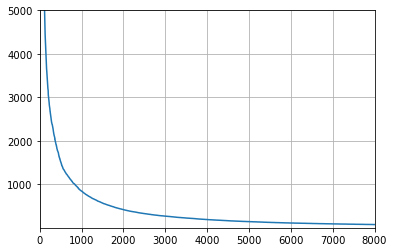

In [135]:
plt.plot(Words, Frequency)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   

In [161]:
# Considering Top 2500 Words with max frequency as our features
featureColumns = [sorted_dic[x][0] for x in range(0,2500)]
featureColumns[1:10]

['cmu',
 'com',
 'news',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines']

In [160]:
len(x_train[1]), len(x_train) , x_train[1] 

(2,
 26795,
 ('38282',
  "Newsgroups: comp.graphics\nPath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!zaphod.mps.ohio-state.edu!uwm.edu!caen!batcomputer!ghost.dsi.unimi.it!rosa\nFrom: rosa@ghost.dsi.unimi.it (massimo rossi)\nSubject: 3d studio works changes!!!!\nOrganization: Computer Science Dep. - Milan University\nDate: Thu, 15 Apr 1993 08:18:06 GMT\nMessage-ID: <1993Apr15.081806.7019@ghost.dsi.unimi.it>\nLines: 28\n\n hi guys\n like all people in this group i'm a fans of fractal and render sw\n my favourite are fractint pov & 3dstudio 2.0 \n now listen my ideas\n i'have just starting now to be able to use 3dstudio quite well\n so i'm simulating a full animation of a f1 grand prix\n unfortanatly just some lap(10?)\n i' m very interested about all kind of .prj .3ds and so on\n concerning about cars or parts of its (motors wheel ...)\n (dxf are good enough)\n does anyone have object to give me to complete my hard animation\n\n\n anyway any excha

In [175]:
len(x_train[0][1])

1984

In [170]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to 
# length of featureColumns
# we will be creating a x_train_dataset matrix of with rows as documents like d1, d2,...
# and columns as features like edu, cmu ...
# any x_train_dataset[something][something] will denote
# how many times does the any feature like edu appeared in the document like
# d1

In [171]:
x_train_dataset = np.zeros([len(x_train),len(featureColumns)],int) # int denotes datatype of any block
x_train_dataset

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [179]:
for i in range(len(x_train)):
    words = x_train[i][1].lower()
    word = re.split(r'\W+', words)
     # We will add the frequency corresponding to that word only which is
     # in our featureColumns
    for j in word:
        if j in featureColumns:
            x_train_dataset[i][featureColumns.index(j)]+=1 # .index gives index of that element
        

In [182]:
type(x_train_dataset)

numpy.ndarray

In [183]:
len(x_train_dataset)

26795

In [188]:
print(x_train_dataset)

[[ 7  3  4 ...  0  0  0]
 [ 4  1  0 ...  0  0  0]
 [ 7  3  1 ...  0  0  0]
 ...
 [10  2  0 ...  0  0  0]
 [ 6  4  6 ...  0  0  0]
 [ 9  2  1 ...  0  0  0]]


In [189]:
# Making x_test dataset
# No. of rows is equivalent to rows in x_test, and column is equal to length to answer1(feature list)
x_test_dataset = np.zeros([len(x_test), len(featureColumns)], int)
for i in range(len(x_test)):
    words = x_test[i][1].lower()
    word = re.split(r'\W+', words)
    # Iterating over each word
    for j in word:
        if j in featureColumns:
            x_test_dataset[i][featureColumns.index(j)]+=1

In [196]:
print(x_train_dataset)
print("=========================")
print(x_test_dataset)

[[ 7  3  4 ...  0  0  0]
 [ 4  1  0 ...  0  0  0]
 [ 7  3  1 ...  0  0  0]
 ...
 [10  2  0 ...  0  0  0]
 [ 6  4  6 ...  0  0  0]
 [ 9  2  1 ...  0  0  0]]
[[ 8  3  0 ...  0  0  0]
 [ 1  1  0 ...  0  0  0]
 [ 7  1  2 ...  0  0  0]
 ...
 [ 5  5  5 ...  0  0  0]
 [14  2  0 ...  0  0  0]
 [ 2  1  0 ...  0  0  0]]


In [198]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [199]:
clf = MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred = clf.predict(x_test_dataset)

In [200]:
print("Score on training Dataset: ", clf.score(x_train_dataset, y_train))
print("Score on test Dataset: ", clf.score(x_test_dataset,y_test))

Score on training Dataset:  0.8991602910990857
Score on test Dataset:  0.8843851806955072


In [201]:
print(confusion_matrix(y_test, y_pred))


[[568   1   0   0   1   0   0   4   7   0   0   0   2   1   1   4   0   2
    0  83]
 [  0 555  30  26  28  20  16   2   2   0   0   0   5   2   2   0   0   0
    0   0]
 [  0   9 544  37   9  44   7   1   0   0   0   0   4   1   0   0   0   0
    0   0]
 [  0   8  15 529  60   1  12   0   1   0   0   1  18   0   0   0   0   0
    0   0]
 [  0   8   2  22 631   0   9   0   0   0   0   0   6   0   0   0   0   0
    0   0]
 [  0  27  25   8  10 558   3   2   0   0   0   2   3   0   3   0   0   0
    0   0]
 [  0   1   0   6   3   0 660   6   2   1   1   0   7   0   0   0   2   0
    0   0]
 [  0   2   0   0   3   2  24 618   7   1   3   0  12   0   2   0   1   0
    1   0]
 [  0   0   0   0   0   0  10  14 646   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0  11   4   6 602  21   0   0   0   2   0   0   0
    0   0]
 [  0   0   0   0   0   2   6   3   2  20 616   0   0   0   1   0   0   0
    1   0]
 [  0   1   1   0   1   5   0   1   0   0   0 627   7   5   1   0

In [202]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.84      0.83       674
           comp.graphics       0.89      0.81      0.85       688
 comp.os.ms-windows.misc       0.88      0.83      0.85       656
comp.sys.ibm.pc.hardware       0.82      0.82      0.82       645
   comp.sys.mac.hardware       0.81      0.93      0.87       678
          comp.windows.x       0.87      0.87      0.87       641
            misc.forsale       0.83      0.96      0.89       689
               rec.autos       0.92      0.91      0.91       676
         rec.motorcycles       0.93      0.96      0.95       670
      rec.sport.baseball       0.95      0.93      0.94       646
        rec.sport.hockey       0.95      0.95      0.95       651
               sci.crypt       0.97      0.96      0.97       650
         sci.electronics       0.87      0.91      0.89       671
                 sci.med       0.96      0.92      0.94       634
         

## Self Implementation of Naive Baye's

In [215]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in featureColumns:
            #Calculating total word in feature
            l=(x_train_with_i[:,featureColumns.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [216]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [217]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [218]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [219]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [220]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [ ]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of 0.86 on testing_data,whereas self implemented classifier gave 0.87 on testing data,which is very close.